# Reading ChemDraw files

Molli features a robust Chemdraw parser, specifically designed to work with the `CDXML` format. This parser is capable of parsing point, axial, and planar chirality, along with full structure labels, substructure labels, atom labels, charges, and multiplicities. This notebook will explain its properties and how to use it.

In [21]:
#This imports molli
import molli as ml

#This configures the visualization tool
ml.visual.configure(bgcolor='white')

# This just loads an example file that contains boundary cases
cdxf = ml.CDXMLFile(ml.files.parser_demo_cdxml)

/home/blakeo2/new_molli/molli_dev/molli/molli/ftypes/cdxml.py:157: CDXMLSyntaxWarning: CDXML file /home/blakeo2/new_molli/molli_dev/molli/molli/files/parser_demo.cdxml contains redundant label 'naphthalene' Only the first occurrence will be kept.
  warn(


### Note: The file was designed to purposely show the warnings when duplicate structures are present!

The `CDXMLFile` class can be thought of as a dictionary, with keys being the label, and the values being the `Molecule`.

In [22]:
# This will display the list of all named molecules in the file.
cdxf.keys()

dict_keys(['benzene', 'naphthalene', 'stereo', 'decoy', 'isotopes', 'phenanthrene_ar', 'estradiol', 'taxadiene', 'substruct_stereo', 'high_complexity_1', 'r_binol', 'chiral_fragment', 'attached_acronym', 'Taniaphos', 'BrettPhos', 'toluene', 'stereo_groups', 'attachments'])

## Maintaining Point Chirality

For the demonstration of how to work with these molecules, the following structure will be used to illustrate how point chirality is maintained. In addition, different functional groups are parsed into their expanded equivalent. Note: all structures should interpreted chemically, and all labels underneath the molecule should be BOLDED and NOT interpreted chemically!

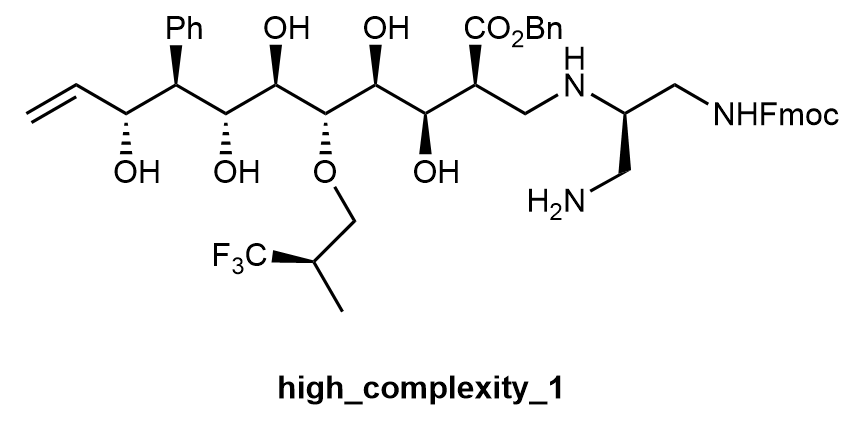

In [23]:
# The molecules can be accessed as the
mol = cdxf["high_complexity_1"]
mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='high_complexity_1', formula='C47 F3 N3 O10')

When chirality is detected, the parser rotates groups of atoms out of the 2D plane of the paper, much like a chemist's intuition would. The structure upon initial parsing does not have have hydrogens. These can be added via the method `add_implicit_hydrogens()`. This will not optimize the `Molecule` but gives a reasonable starting point.

In [24]:
#Adds implicit hydrogens to Molecule
mol.add_implicit_hydrogens()
mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='high_complexity_1', formula='C47 H56 F3 N3 O10')

## Maintaining Labels

One of the most useful features of the CDXML parser is that unique labels can be maintained from the original `CDXML` file. For those that are unaware, it is possible to add your own labels by selecting an atom in the ChemDraw file, clicking the `'` key, then typing your unique label. `molli` maintains whatever label is used and assigns it to the atom once it is read in. This can be leveraged in downstream tasks if certain atoms are important, especially if lists of atoms get instantiated arbitrarily.

An example of this will be shown with the molecule below

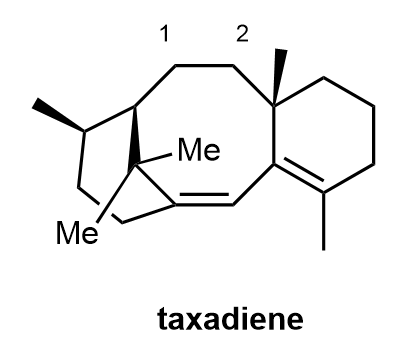

In [25]:
#This accesses the molecule
m = cdxf["taxadiene"]

#This adds implicit hydrogens
m.add_implicit_hydrogens()
m

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='taxadiene', formula='C20 H32')

This illustrates that regardless of the `Molecule` instantiation, the labels are maintained.

In [26]:
#This prints the full atom, including the labels
for atom in m.atoms:
    print(atom)


Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label='2', formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label='1', formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None, formal_charge=0, formal_spin=0)
Atom(element=C, isotope=None, label=None

## Maintaing Axial Chirality

The `molli` CDXML parser also has the ability to parse axial chirality. It moves groups of atoms based on the boldness of certain bonds. This has been tested on a variety of structures, and upon force-field optimization, the structures never invert. Here is an example of an axial chiral structure that can be parsed.

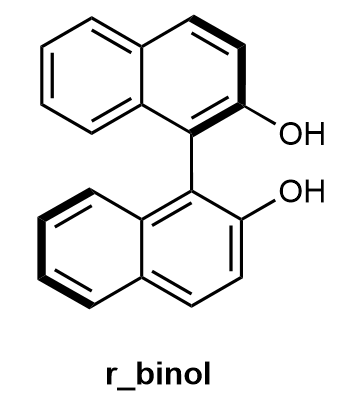

In [27]:
# This accesses the molecule
m = cdxf['r_binol']
m

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='r_binol', formula='C20 O2')

## Maintaing Planar Chirality

`molli` has the ability to parse multi-attachment points and actually maintain a significant amount of information about bonding information that is often difficult to access with the `CDXML` format. The first example illustrates maintaining both planar AND point chirality at the same time.

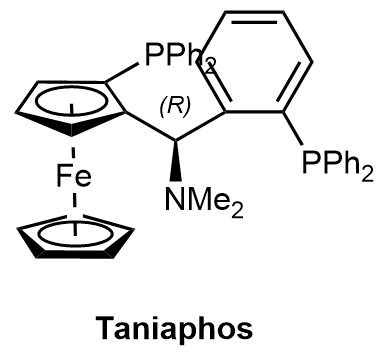

In [28]:
#This accesses the structure
m = cdxf['Taniaphos']
m

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='Taniaphos', formula='C43 Fe1 N1 P2')

Here is an additional structure showing the ability to parse pi-allyl complexes and even non-traditional bonds via a Pd-allyl BrettPhos structure:

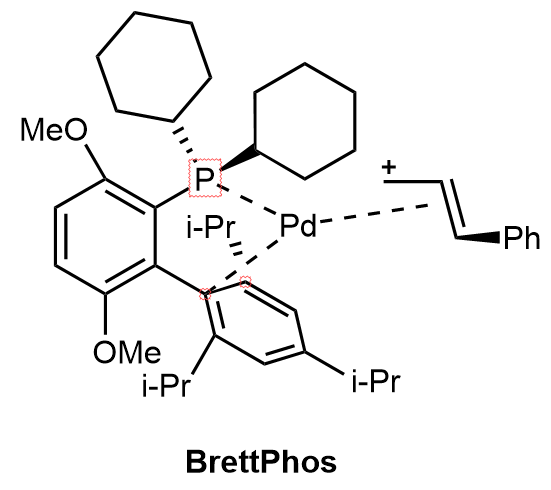

In [29]:
#This accesses the structure
m = cdxf['BrettPhos']
m

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='BrettPhos', formula='C44 O2 P1 Pd1')

## Maintaining Charges and Multiplicity

`molli` can understand not only the charges of certain structures, but also the multiplicity of varying structures. This results in a very robust parsing algorithm, where even upon adding implicit hydrogens, it does not add too many. A simple example can be shown utilizing N-Oxide compounds

### Charge Example 

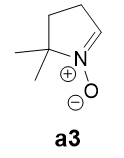

In [30]:
# This reads the cdxml file
cdxf2 = ml.CDXMLFile(ml.files.charges_mult_cdxml)

#This accesses the structure
m = cdxf2['a3']

#This finds the nitrogen
nitrogen = m.get_atom(ml.Element.N)

#This finds the oxygen
oxygen = m.get_atom(ml.Element.O)

print(f'The formal charge on Nitrogen = {nitrogen.formal_charge}')
print(f'The formal charge on Oxygen = {oxygen.formal_charge}')
print(f'The charge of the Molecule = {m.charge}')


#This adds the implicit hydrogens
m.add_implicit_hydrogens()
m

The formal charge on Nitrogen = 1
The formal charge on Oxygen = -1
The charge of the Molecule = 0


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='a3', formula='C6 H11 N1 O1')

### Charge and Multiplicity Example 

Since `molli` can parse the electrons drawn on an atom, it can perceive if hydrogens are necessary upon addition of implicit hydrogens

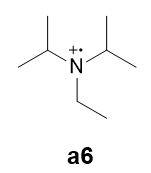

In [31]:
#This accesses the structure
m = cdxf2['a6']

#This finds the nitrogen
nitrogen = m.get_atom(ml.Element.N)
print(f'The formal charge on Nitrogen = {nitrogen.formal_charge}, The formal spin on Nitrogen = {nitrogen.formal_spin}')
print(f'The charge of the Molecule = {m.charge}, The multiplicity of the Molecule = {m.mult} ')

#This adds the implicit hydrogens
m.add_implicit_hydrogens()
m

The formal charge on Nitrogen = 1, The formal spin on Nitrogen = 1
The charge of the Molecule = 1, The multiplicity of the Molecule = 2 


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='a6', formula='C8 H19 N1')

### Multiplicity Example

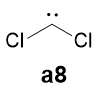

In [32]:
#This accesses the structure
m = cdxf2['a8']

#This finds the nitrogen
carbon = m.get_atom(ml.Element.C)
print(f'The formal charge on Carbon = {carbon.formal_charge}, The formal spin on Carbon = {carbon.formal_spin}')
print(f'The charge of the Molecule = {m.charge}, The multiplicity of the Molecule = {m.mult} ')

#This adds the implicit hydrogens
m.add_implicit_hydrogens()
m

The formal charge on Carbon = 0, The formal spin on Carbon = 2
The charge of the Molecule = 0, The multiplicity of the Molecule = 3 


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Molecule(name='a8', formula='C1 Cl2')